In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [2]:
dataset = pd.read_csv('new_appdata102.csv')

# Data Preprocessing

In [3]:
response = dataset['enrolled']
dataset = dataset.drop(columns='enrolled')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,response,test_size=0.2, random_state=0)


In [4]:
X_train.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,LoansCount
20330,315793,2,20,32,5,0,1,1,0,0,...,1,0,0,0,0,0,2,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,0,13,0,1,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,0,10,0,2,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,0,10,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,0,3,0,2,0


In [5]:
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')

test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

In [6]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,LoansCount
11841,0,1,41,34,0,0,1,1,0,1,...,0,0,0,0,0,0,11,0,0,0
19602,5,6,26,30,0,0,0,1,0,1,...,0,0,0,0,0,0,9,0,0,1
45519,0,15,37,11,0,1,0,0,0,0,...,0,0,0,0,0,0,5,0,1,2
25747,5,19,21,13,0,0,1,0,0,1,...,0,0,0,0,0,0,8,0,0,0
42642,5,1,30,32,0,0,0,0,0,1,...,0,0,0,0,0,0,4,3,0,0


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.head()

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,3.035970,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,0.309800
2,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.785389
3,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,0.309800
4,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-1.165789


In [8]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,LoansCount
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,3.035970,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,0.309800
2,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.785389
3,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,0.309800
4,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-1.165789


In [9]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,3.035970,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-1.165789


In [10]:
X_train = X_train2
X_test = X_test2

# Model Building

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
y_pred

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7677

In [13]:
precision_score(y_test,y_pred)

0.7607607607607607

In [14]:
recall_score(y_test,y_pred)

0.7711038961038961

In [15]:
f1_score(y_test,y_pred)

0.7658974100574424

Test Data Accurency : 0.7677


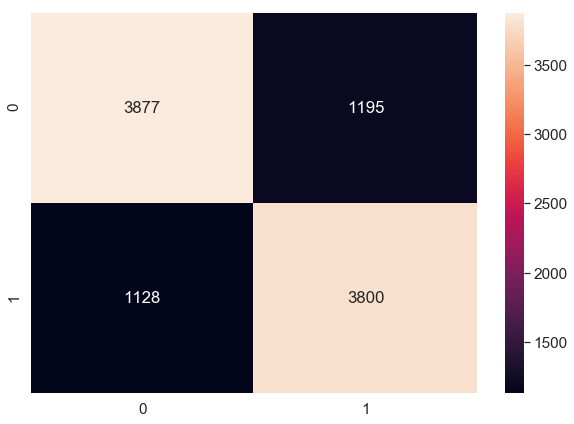

In [16]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print('Test Data Accuracy : %0.4f'% accuracy_score(y_test,y_pred))

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train,y=y_train)
print('Logistic Accuracy : %0.3f (+/- %0.3f)' % (accuracies.mean(),accuracies.std()*2))

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Accuracy : 0.767 (+/- 0.004)


C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model Conclusion : Formatting the Final Results

In [21]:
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
